<a href="https://colab.research.google.com/github/theslic/Standerized-Testing-Analysis/blob/main/Li_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook is the analysis of how socioeconomic factors might be able to predict ACT scores. In this notebook we will look for the best variables that would be used to predict ACT scores. We will created models and analyze their ability to predict ACT scores and then provide the best variables that can be used to predict ACT scores.

## Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Model Creation
import statsmodels.formula.api as smf
import statsmodels.api as sm
from itertools import combinations
from math import comb
import sys

# Model Analysis
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [35]:
url = 'https://raw.githubusercontent.com/theslic/Standerized-Testing-Analysis/main/clean_test_education_inequality.csv'
df_test = pd.read_csv(url, index_col=0)
url = 'https://raw.githubusercontent.com/theslic/Standerized-Testing-Analysis/main/clean_train_education_inequality.csv'
df = pd.read_csv(url, index_col=0)

##### $\rightarrow$ Review the contents of the data set.

In [36]:
df = df.reset_index()
df.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,state,average_act
0,103469.0,0.792264,0.192202,0.978979,0.107202,TN,20.800000
1,45455.0,0.656210,0.647465,0.385778,0.124411,MI,16.000000
2,90372.0,0.781051,0.207287,0.765101,0.081699,NJ,22.228327
3,26327.0,0.829502,0.223744,0.746988,0.092072,MI,23.300000
4,47830.0,0.650768,0.404255,0.730909,0.038495,TX,20.396825


In [37]:
df_test = df_test.reset_index()
df_test.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,state,average_act
0,34651.0,0.349554,0.684768,0.629116,0.090241,LA,17.500000
1,28832.0,0.528461,0.604555,0.318627,0.117860,NY,17.759463
2,69809.0,0.779547,0.208872,0.642458,0.087397,FL,21.422466
3,50888.0,0.497770,0.238503,0.735178,0.093333,IN,21.776557
4,56042.0,0.722777,0.997460,0.635306,0.120723,GA,18.858364


## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


We want to find the best variables to predict ACT scores?  
How might location affect how to predict ACT scores?

## Analysis

We do a pairplot to look at the variables to find any interesting distributions of clear outliers in the data.

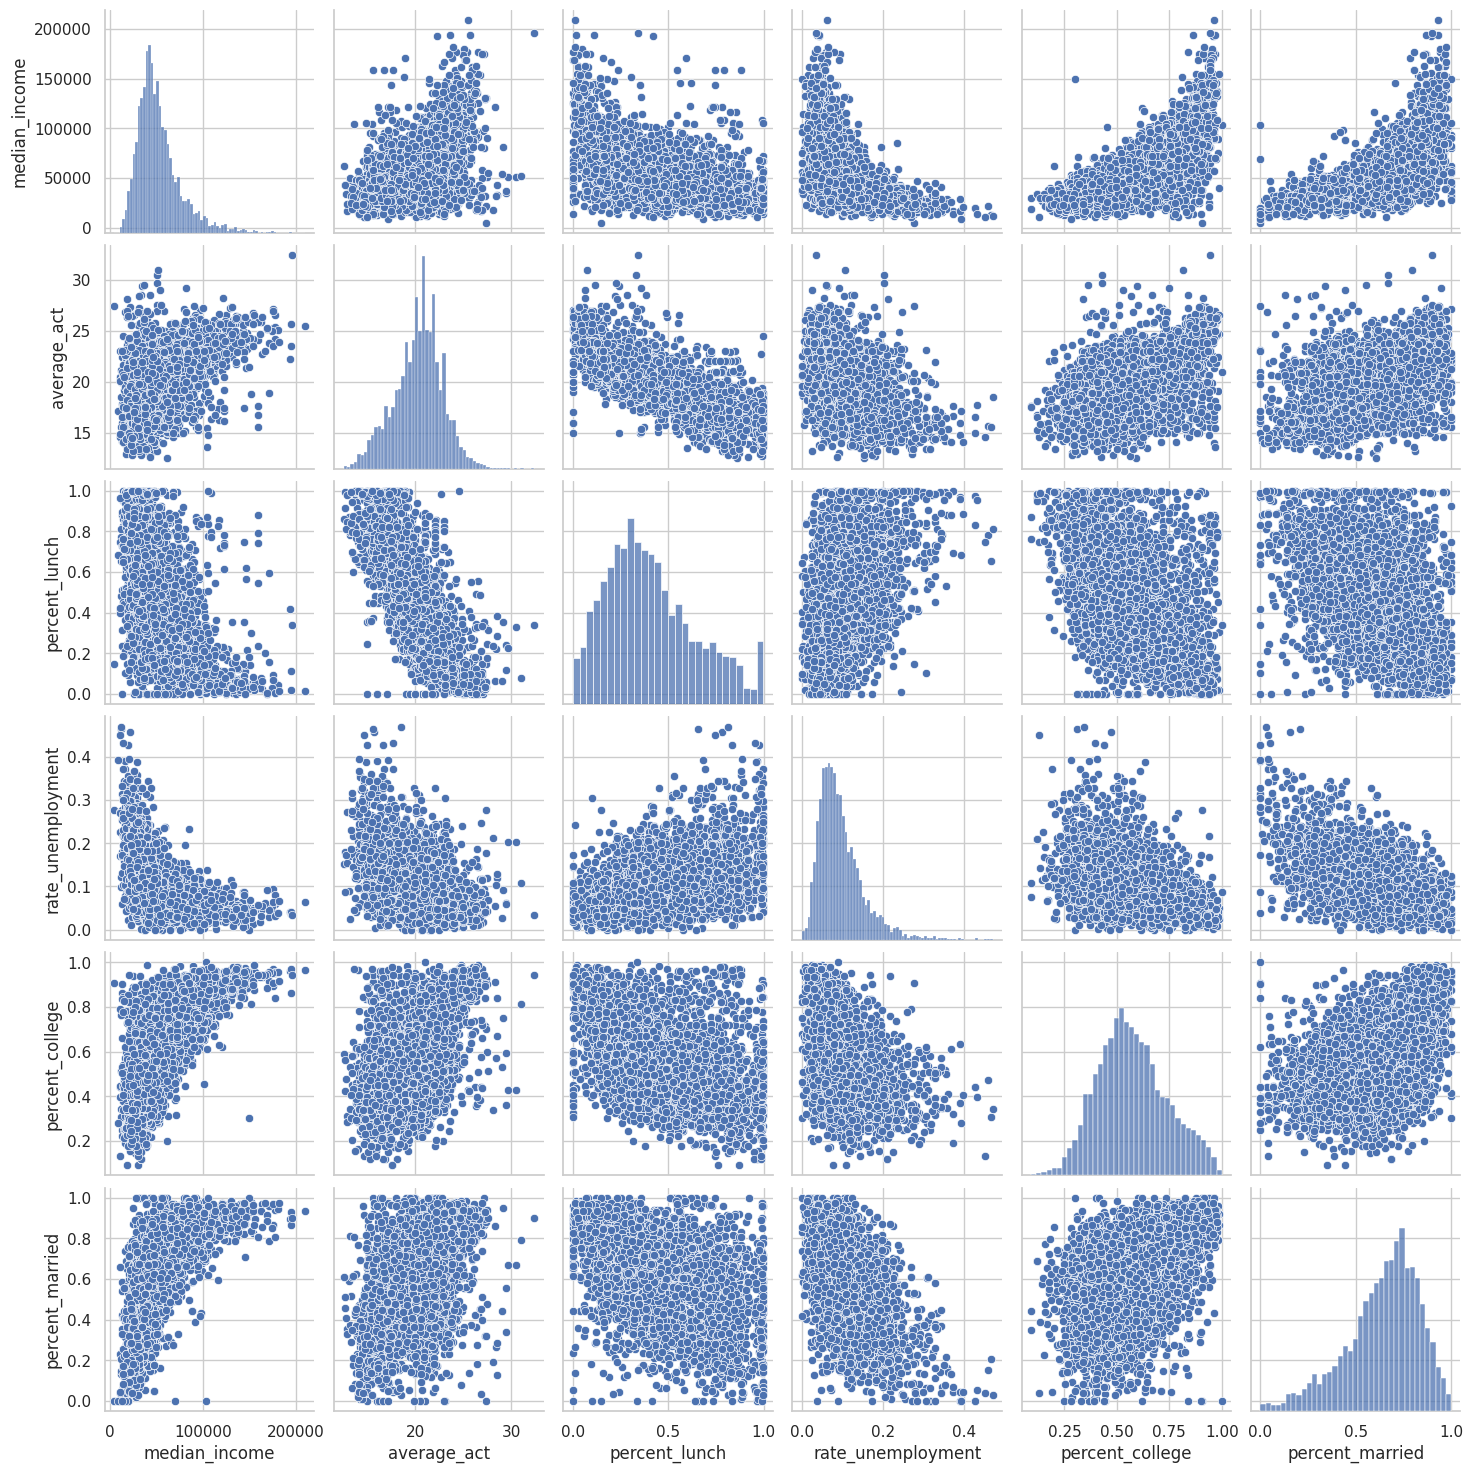

In [38]:
sns.pairplot(data = df.loc[:,['median_income', 'average_act', 'percent_lunch', 'rate_unemployment', 'percent_college', 'percent_married']])

We do a correlation matrix to compare the different variables with eachother to find the ones that could be siginificant in predicting ACT scores. From this we can see that all of them seem decent for prediction with percent_lunch being the most valuable in predicting ACT scores.

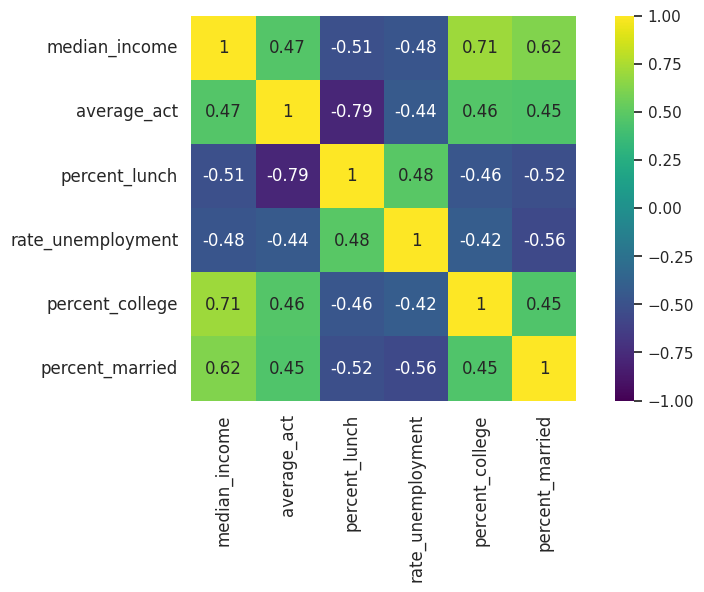

In [39]:
corr_matrix = df.loc[:,['median_income', 'average_act', 'percent_lunch', 'rate_unemployment', 'percent_college', 'percent_married']].corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

In [40]:
X = df[df.columns.difference(['average_act'])]
y = df['average_act']
variable_names = X.columns.values
variable_names

array(['median_income', 'percent_college', 'percent_lunch',
       'percent_married', 'rate_unemployment', 'state'], dtype=object)

In [41]:
minBic = sys.maxsize
minAic = sys.maxsize
aic = 0
bic = 0
bestSubsetAic = ''
bestSubsetBic = ''

# Finding the best with 2 variables
def giveMeValue2(var1, var2):
  thisModel = smf.ols(formula=('average_act ~ ' + var1 + ' + ' + var2), data=df).fit()
  return (thisModel.rsquared_adj, thisModel.aic, thisModel.bic)


subset = combinations(variable_names, 2)
maxR = 0
bestSubset2 = ''

for n, names in enumerate(subset):
  keyValues = giveMeValue2(names[0], names[1])
  if keyValues[0] > maxR:
    maxR = keyValues[0]
    bestSubset2 = names
    minAic = keyValues[1]
    minBic = keyValues[2]



print('The best subset for 2 variables according to adjusted r-squared would be: ')
print(bestSubset2)
print('With an adjusted r-squared of: ')
print(maxR)

The best subset for 2 variables according to adjusted r-squared would be: 
('percent_lunch', 'state')
With an adjusted r-squared of: 
0.6737523654473156


In [42]:
# Finding the best with 3 variables
def giveMeValue3(var1, var2, var3):
  thisModel = smf.ols(formula=('average_act ~ ' + var1 + ' + ' + var2 + ' + ' + var3), data=df).fit()
  return (thisModel.rsquared_adj, thisModel.aic, thisModel.bic)

subset = combinations(variable_names, 3)
maxR = 0
bestSubset3 = ''

for n, names in enumerate(subset):
  keyValues = giveMeValue3(names[0], names[1], names[2])
  if keyValues[0] > maxR:
    maxR = keyValues[0]
    bestSubset3 = names
    aic = keyValues[1]
    bic = keyValues[2]

if minAic > aic:
  minAic = aic
  bestSubsetAic = bestSubset3

if minBic > bic:
  minBic = bic
  bestSubsetBic = bestSubset3

print('The best subset for 3 variables according to adjusted r-squared would be: ')
print(bestSubset3)
print('With an adjusted r-squared of: ')
print(maxR)

The best subset for 3 variables according to adjusted r-squared would be: 
('percent_college', 'percent_lunch', 'state')
With an adjusted r-squared of: 
0.685353858258862


In [43]:
# Finding the best with 4 variables
def giveMeValue4(var1, var2, var3, var4):
  thisModel = smf.ols(formula=('average_act ~ ' + var1 + ' + ' + var2 + ' + ' + var3 + ' + ' + var4), data=df).fit()
  return (thisModel.rsquared_adj, thisModel.aic, thisModel.bic)

subset = combinations(variable_names, 4)
maxR = 0
bestSubset4 = ''

for n, names in enumerate(subset):
  keyValues = giveMeValue4(names[0], names[1], names[2], names[3])
  if keyValues[0] > maxR:
    maxR = keyValues[0]
    bestSubset4 = names

if minAic > aic:
  minAic = aic
  bestSubsetAic = bestSubset4

if minBic > bic:
  minBic = bic
  bestSubsetBic = bestSubset4


print('The best subset for 4 variables according to adjusted r-squared would be: ')
print(bestSubset4)
print('With an adjusted r-squared of: ')
print(maxR)

The best subset for 4 variables according to adjusted r-squared would be: 
('percent_college', 'percent_lunch', 'rate_unemployment', 'state')
With an adjusted r-squared of: 
0.6855340302795616


In [44]:
# Finding the best with 5 variables
def giveMeValue5(var1, var2, var3, var4, var5):
  thisModel = smf.ols(formula=('average_act ~ ' + var1 + ' + ' + var2 + ' + ' + var3 + ' + ' + var5), data=df).fit()
  return (thisModel.rsquared_adj, thisModel.aic, thisModel.bic)

subset = combinations(variable_names, 5)
maxR = 0
bestSubset5 = ''

for n, names in enumerate(subset):
  keyValues = giveMeValue5(names[0], names[1], names[2], names[3], names[4])
  if keyValues[0] > maxR:
    maxR = keyValues[0]
    bestSubset5 = names


if minAic > aic:
  minAic = aic
  bestSubsetAic = bestSubset5

if minBic > bic:
  minBic = bic
  bestSubsetBic = bestSubset5



print('The best subset for 5 variables according to adjusted r-squared would be: ')
print(bestSubset5)
print('With an adjusted r-squared of: ')
print(maxR)

The best subset for 5 variables according to adjusted r-squared would be: 
('percent_college', 'percent_lunch', 'percent_married', 'rate_unemployment', 'state')
With an adjusted r-squared of: 
0.6854398288221151


Here we see that out of all the different combinations of variables we see that the best model is with 3 variables: percent_college, percent_lunch as well as state.

In [45]:
print('The best subset according to AIC is:')
print(bestSubsetAic)
print('With an AIC value of:')
print(minAic)

print('The best subset according to BIC is:')
print(bestSubsetBic)
print('With an BIC value of:')
print(minBic)

The best subset according to AIC is:
('percent_college', 'percent_lunch', 'state')
With an AIC value of:
20304.557668693997
The best subset according to BIC is:
('percent_college', 'percent_lunch', 'state')
With an BIC value of:
20451.00685521771


We calculate the rmse and the r-squared to see if the model is good at predicting ACT scores. With an r-squared of .686 the model does seem to work quite well in predicting ACT scores.

In [49]:
model = smf.ols(formula='average_act ~ percent_college + percent_lunch + state', data=df).fit()
y_pred = model.predict(X)

# Evaluate accuracy of model on test set
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y, y_pred)

print("MSE:", mse)
print('RMSE:', rmse)
print('R-squared:', r_squared)

RMSE: 1.409387962919375
R-squared: 0.686503400530359


In this plot we can see the blue values are bunched next to the red line meaning that our predictions of ACT scores is quite accurate and the model does well.

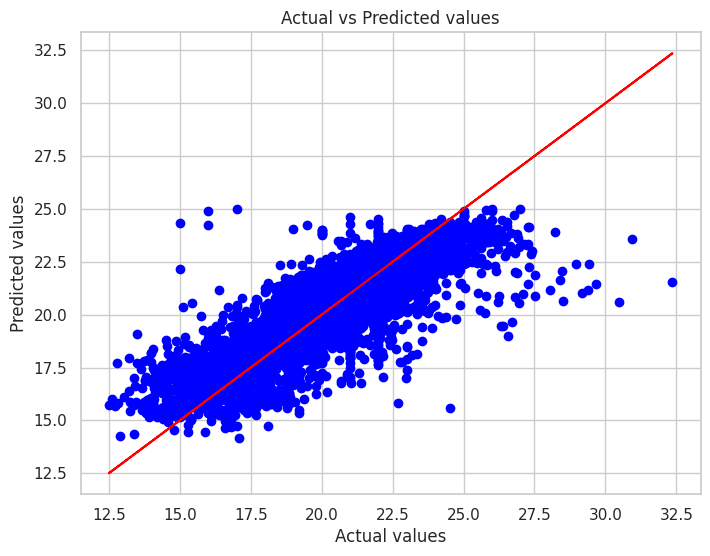

In [52]:
plt.figure(figsize=(8,6))

plt.scatter(y, y_pred, color='blue', marker='o')
plt.plot(y, y, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()

## Conclusion

To answer the question of if we can predict ACT scores using socioeconomic factores, we are able to have decent predictions. For our second question of if location would help in predicting ACT socres, it is true since the state is included in the model. The best subset to predict ACT scores would be percent_college, percent_lunch and state. After using the test set to observe the model's accuracy we can see that the model does quite well in predicting ACT scores.